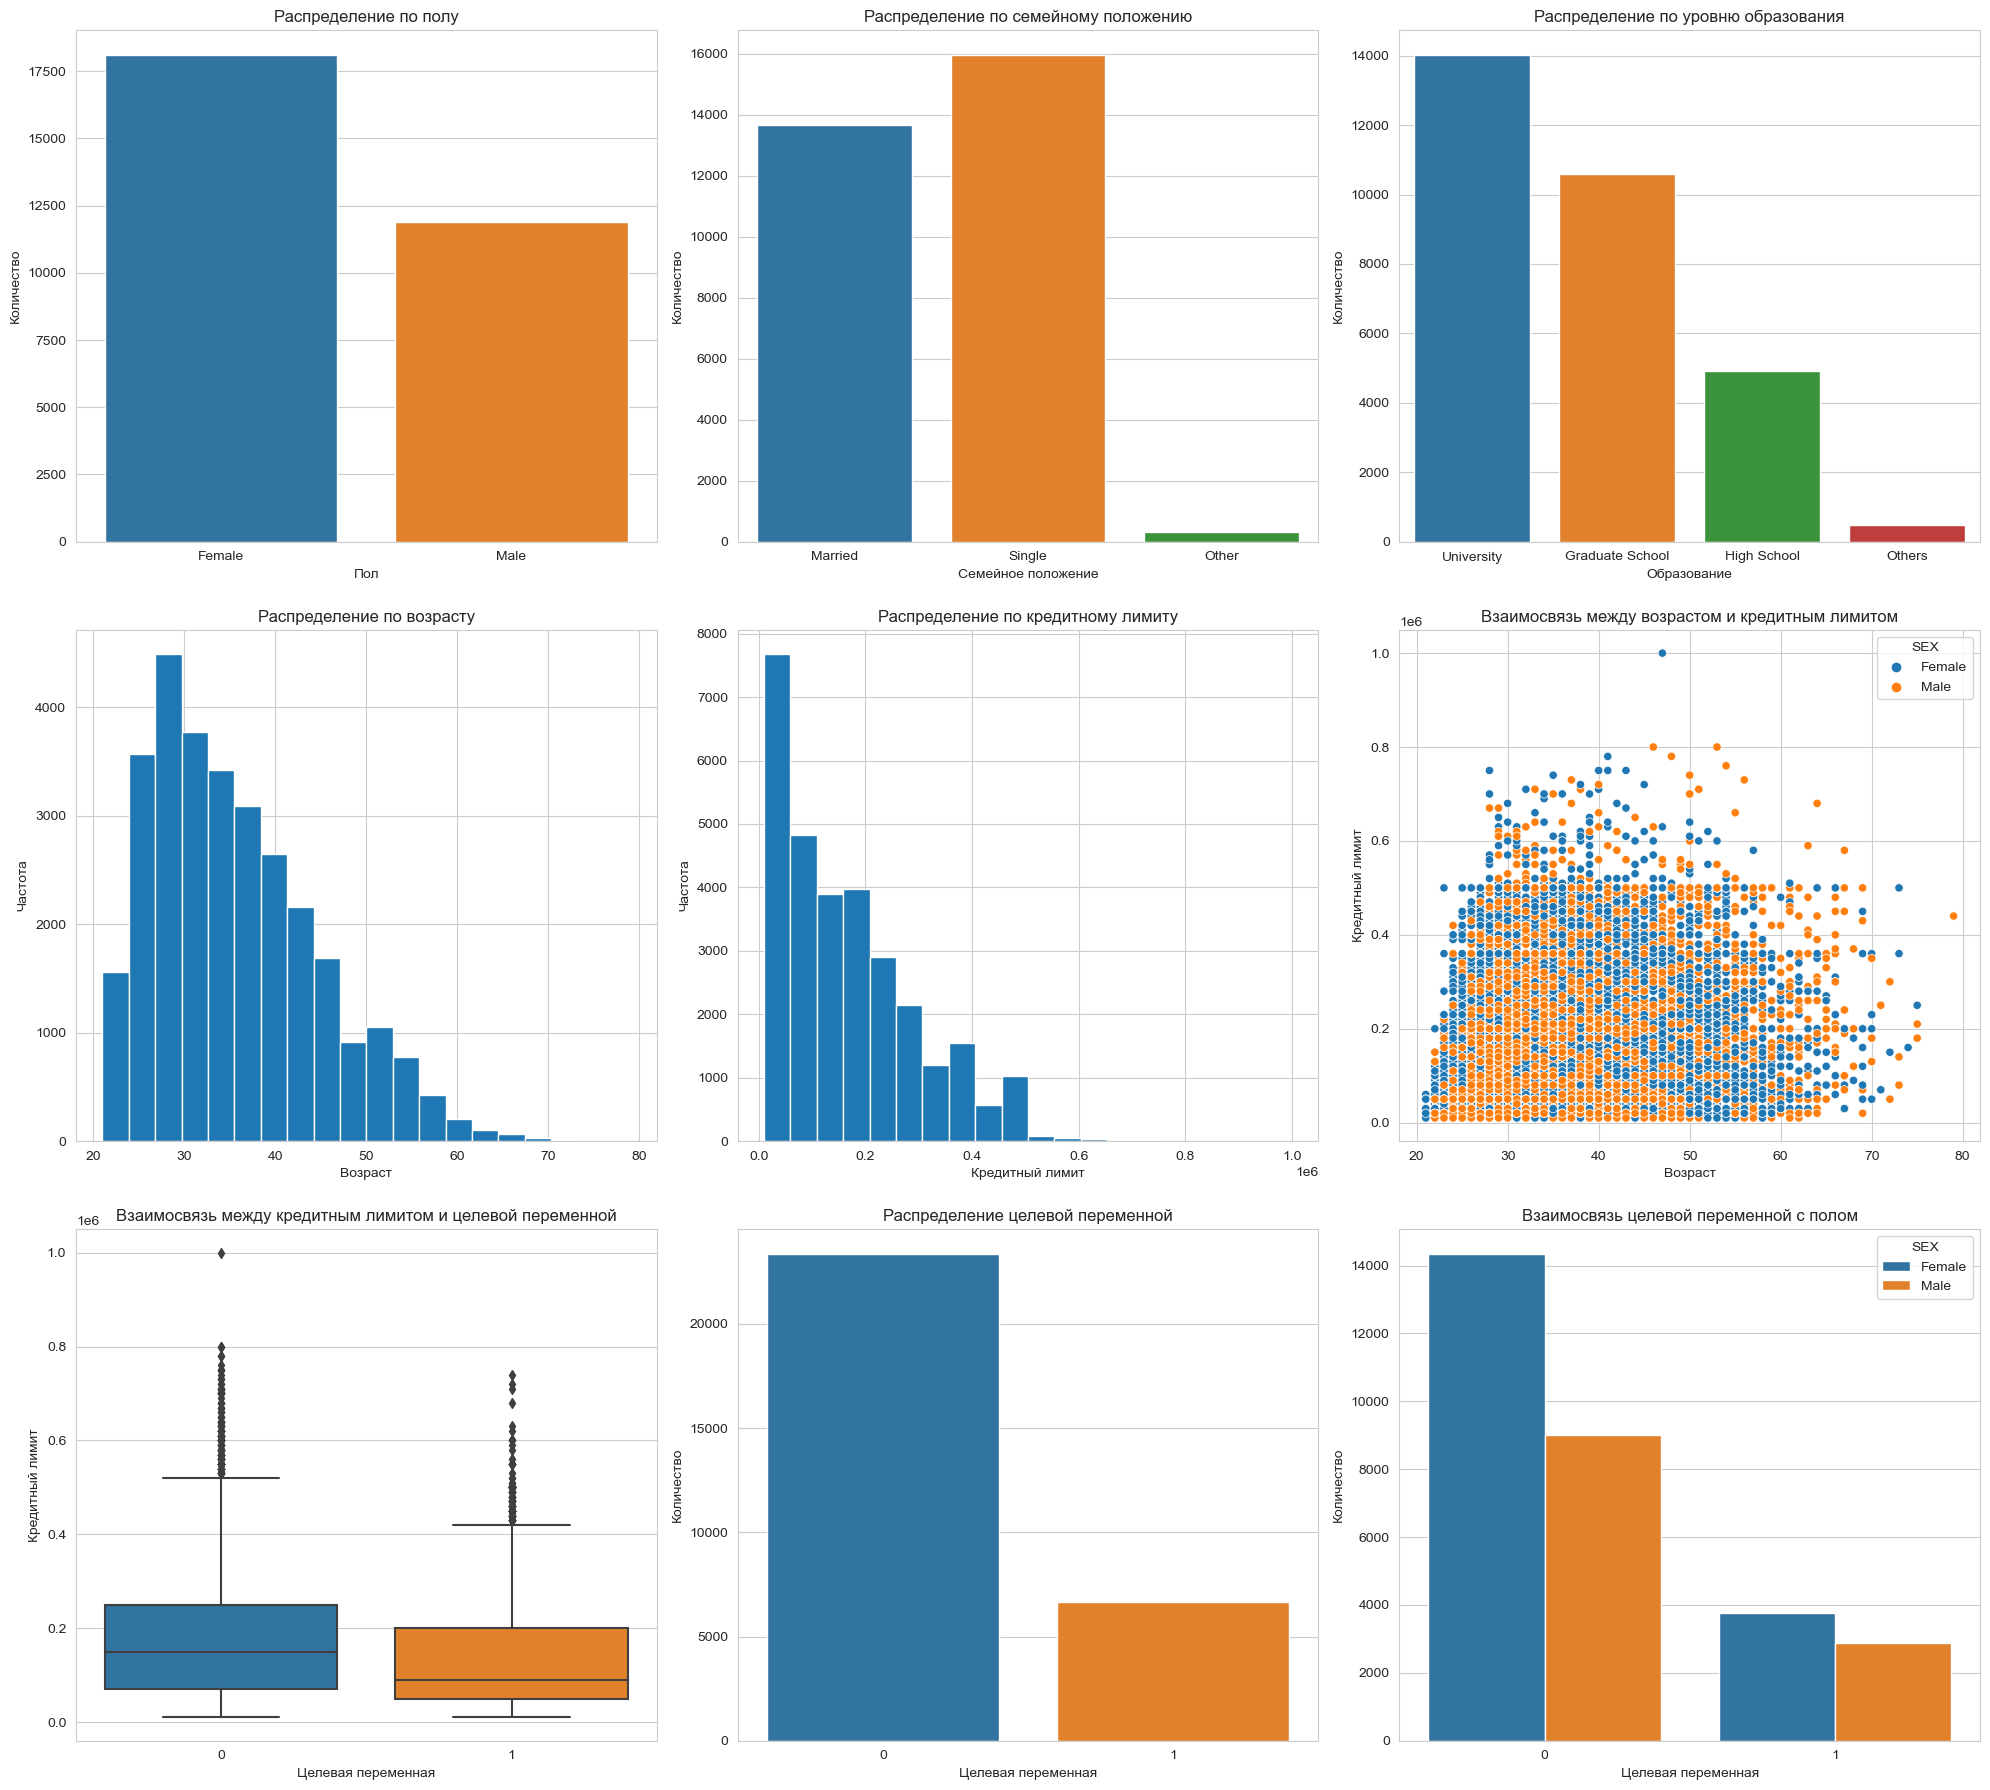

In [1]:
%matplotlib inline

#basic data analysis libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pylab as plt
import seaborn as sns
sns.set_style("whitegrid")

from IPython.display  import HTML
#import sweetviz

# Загрузка данных
df = pd.read_csv('UCI_Credit_Card.csv')

# Переименование столбца target
df = df.rename(columns={'default.payment.next.month': 'target'})

# Замена пропущенных значений
df = df.replace([np.inf, -np.inf], np.nan).fillna(0)

# Преобразование переменных
df['SEX'] = df['SEX'].map({1: 'Male', 2: 'Female'})
df['MARRIAGE'] = df['MARRIAGE'].map({1: 'Married', 2: 'Single', 3: 'Other'})
df['EDUCATION'] = df['EDUCATION'].replace([0, 4, 5, 6], 4).map({1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others'})

# Создание subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 18))

# Распределение по полу (SEX)
sns.countplot(data=df, x='SEX', ax=axes[0, 0])
axes[0, 0].set_title('Распределение по полу')
axes[0, 0].set_xlabel('Пол')
axes[0, 0].set_ylabel('Количество')

# Распределение по семейному положению (MARRIAGE)
sns.countplot(data=df, x='MARRIAGE', ax=axes[0, 1])
axes[0, 1].set_title('Распределение по семейному положению')
axes[0, 1].set_xlabel('Семейное положение')
axes[0, 1].set_ylabel('Количество')

# Распределение по уровню образования (EDUCATION)
sns.countplot(data=df, x='EDUCATION', ax=axes[0, 2])
axes[0, 2].set_title('Распределение по уровню образования')
axes[0, 2].set_xlabel('Образование')
axes[0, 2].set_ylabel('Количество')

# Распределение по возрасту (AGE)
df['AGE'].hist(bins=20, ax=axes[1, 0])
axes[1, 0].set_title('Распределение по возрасту')
axes[1, 0].set_xlabel('Возраст')
axes[1, 0].set_ylabel('Частота')

# Распределение по кредитному лимиту (LIMIT_BAL)
df['LIMIT_BAL'].hist(bins=20, ax=axes[1, 1])
axes[1, 1].set_title('Распределение по кредитному лимиту')
axes[1, 1].set_xlabel('Кредитный лимит')
axes[1, 1].set_ylabel('Частота')

# Взаимосвязь между возрастом и кредитным лимитом
sns.scatterplot(data=df, x='AGE', y='LIMIT_BAL', hue='SEX', ax=axes[1, 2])
axes[1, 2].set_title('Взаимосвязь между возрастом и кредитным лимитом')
axes[1, 2].set_xlabel('Возраст')
axes[1, 2].set_ylabel('Кредитный лимит')

# Взаимосвязь между кредитным лимитом и целевой переменной
sns.boxplot(data=df, x='target', y='LIMIT_BAL', ax=axes[2, 0])
axes[2, 0].set_title('Взаимосвязь между кредитным лимитом и целевой переменной')
axes[2, 0].set_xlabel('Целевая переменная')
axes[2, 0].set_ylabel('Кредитный лимит')

# Распределение целевой переменной
sns.countplot(data=df, x='target', ax=axes[2, 1])
axes[2, 1].set_title('Распределение целевой переменной')
axes[2, 1].set_xlabel('Целевая переменная')
axes[2, 1].set_ylabel('Количество')

# Взаимосвязь целевой переменной с полом
sns.countplot(data=df, x='target', hue='SEX', ax=axes[2, 2])
axes[2, 2].set_title('Взаимосвязь целевой переменной с полом')
axes[2, 2].set_xlabel('Целевая переменная')
axes[2, 2].set_ylabel('Количество')

plt.tight_layout()
plt.show()
